<a href="https://colab.research.google.com/github/kimheeseo/python/blob/main/part3_cha24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**chapter 24. 회전을 통해 새로운 학습 데이터 만들기**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

# URL: https://github.com/makeyourownneuralnetwork/makeyourownneuralnetwork/blob/master/part3_mnist_data_set_with_rotations.ipynb

Mounted at /content/drive


In [3]:
# MNIST 데이터는 사람들이 직접 쓴 숫자와 관련해 풍부한 예제를 가지고 있습니다. 다양한 스타일의 필체가
# 포함되어 있으며, 좋은 필체의 데이터와 안 좋은 필체의 데이터를 모두 포함합니다.
# 신경망은 가급적 이처럼 변형에 대해 다양하게 학습하는 것이 좋습니다.

# 만약 우리가 이러한 변형을 직접 만들어서 예제에 추가해 학습할 수 있다면 더 유용하지 않을까요?
# 아이디어: 현재의 예제들에 변형을 가해서 새로운 예제들을 만드는 것입니다. -> 현재의 예제들을 시계 방향과 반시계 방향으로 10도씩
# 회전시킴으로써 새로운 예제들을 만들 수 있는 것입니다.

In [ ]:
# ndimage.interpolation.rotate()함수: 행렬을 주어진 각도만큼 회전.
# 입력 값은 784의 길이를 가지는 1차원 리스트가 되어야 한다는 사실을 기억하고 있을 것입니다.
# 우리는 이 1차원의 리스트를 28*28의 행렬로 변환한 다음에 회전하고, 신경망에 입력값으로 전달할 때에는
# 이를 다시 784의 길이를 가지는 리스트의 형태인 입력 신호로 원상 복구할 것입니다.

**ndimage.interpolation.rotate()**

In [ ]:
# 회전된 변형 이미지를 생성
# 반시계 방향으로 10도 회전
import numpy as np
import scipy

# 반시계 방향으로 10도 회전
inputs_plus10_img=scipy.ndimage.interpolation.rotate(scaled_input.reshape(28,28), 10, cval=0.01, reshape=False)

# 시계 방향으로 10도 회
inputs_plus10_img=scipy.ndimage.interpolation.rotate(scaled_input.reshape(28,28), 10, cval=0.01, reshape=False)

# reshape=False: 라이브러리가 이미지를 찌그러뜨리는 것을 방지했고, 따라서 회전이 일어난 후에도 이미지의 어떤 부분도
# 잘리지 않습니다. cval: 배열의 원소를 채우기 위해 사용되는 값인데, 이 원소들이 원래의 이미지에는 존재하지 않다가 이제
# 보여야 하는 부분이기 때문. -> 신경망의 입력 값으로 0이 들어가는 것을 방지하기 위해 범위를 조정했기 때문에, 기본값으로 0.01을 가지게 합니다.

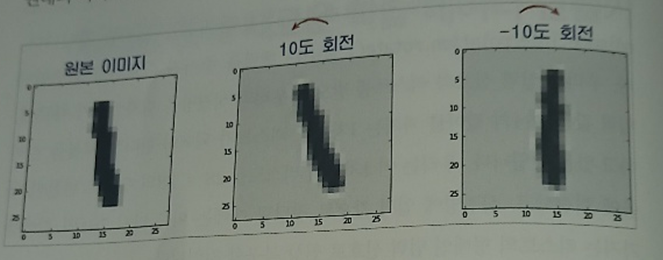

In [7]:
# 원본 이미지를 10도 회전한 이미지는 일반적인 1과는 반대의 기울기를 가지게 쓰는 스타일의 사람이
# 쓴 것처럼 보입니다. 원본 이미지를 -10도 회전한 이미지는 더 흥미로운데, 이 이미지는 사실 원래의
# 이미지보다 더 똑바로 생긴 것을 볼 수 있습니다. 어쩌면 1을 더 제대로 학습할 수 있는 대표적인 데이터가
# 될 수도 있을 것 같습니다.

# open the CSV file and read its contents into a list
data_file = open("/content/mnist_train_100.csv", 'r')
data_list = data_file.readlines()
data_file.close()

# which record will be use
record = 6

In [11]:
import numpy
import matplotlib.pyplot

# scale input to range 0.01 to 1.00
all_values = data_list[record].split(',')
scaled_input = ((numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01).reshape(28,28)

In [12]:
print(numpy.min(scaled_input))
print(numpy.max(scaled_input))

0.01
1.0


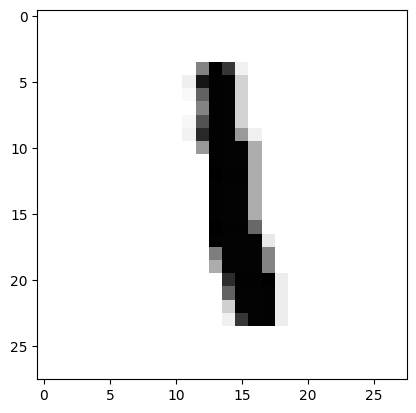

In [13]:
# plot the original image
matplotlib.pyplot.imshow(scaled_input, cmap='Greys', interpolation='None')

In [14]:
# create rotated variations
# rotated anticlockwise by 10 degrees
inputs_plus10_img = scipy.ndimage.rotate(scaled_input, 10.0, cval=0.01, order=1, reshape=False)
# rotated clockwise by 10 degrees
inputs_minus10_img = scipy.ndimage.rotate(scaled_input, -10.0, cval=0.01, order=1, reshape=False)

**반시계방향으로 회전**

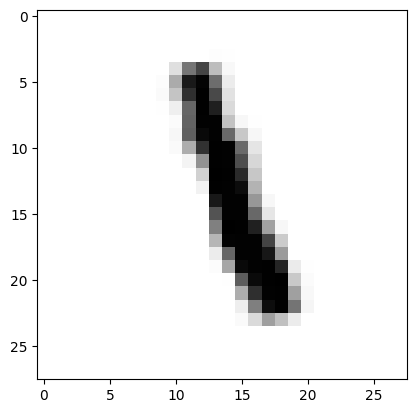

In [15]:
# plot the +10 degree rotated variation
matplotlib.pyplot.imshow(inputs_plus10_img, cmap='Greys', interpolation='None')

**시계방향으로 회전**

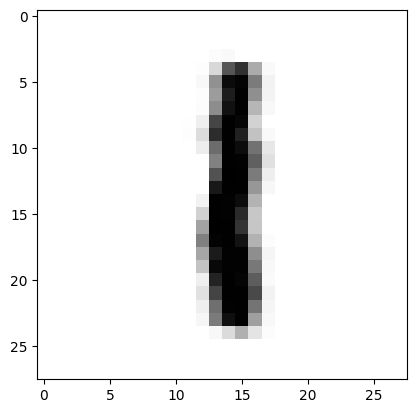

In [16]:
# plot the +10 degree rotated variation
matplotlib.pyplot.imshow(inputs_minus10_img, cmap='Greys', interpolation='None')

In [ ]:
# 여러 가지 내재된 제약들, 즉 특정한 신경망의 구조나 학습 데이터의 불완전성 등으로 인해
# 우리가 100%의 성능을 기대하지는 않는다는 점을 기억할 겁니다.

# 다음 그래프에서 학습 이미지에 회전각을 달리함에 따른 성능의 차이를 확인할 수 있습니다.

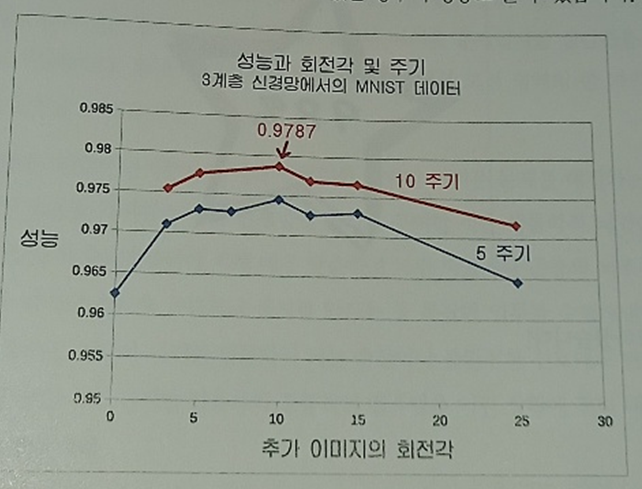

In [ ]:
# 회전각이 커질 때 성능이 떨어진다는 점에 주목할 필요가 있습니다.
# 회전각이 크다는 것은 그 숫자를 제대로 표현하지 못한다는 것을 의미하므로 상식적으로 이해가 되는 결과.

# 예를 들어, 3이라는 숫자를 90도 회전했다고 생각해봅시다. 그것은 더 이상 3이 아닙니다.
# 따라서 회전각이 너무 큰 학습 데이터를 추가하면 잘못된 데이터를 추가하는 것과 마찬가지이므로,
# 학습의 품질을 떨어뜨리게 되는 결과를 초래하게 되는 것입니다.

# 추가되는 데이터의 가치를 최대화하기 위해 적절한 각도는 10도 정도로 보입니다.

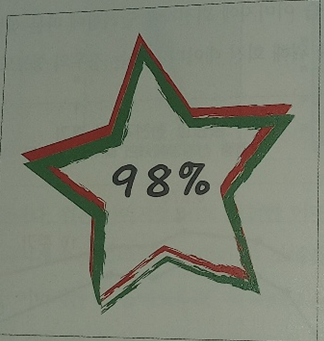

In [ ]:
# 그래프를 다시 보면 10주기를 돌렸을 때, 최고 성능은 0.9787로 거의 98%에 육박합니다.
# 이는 이렇게 간단한 네트워크로 달성할 수 있는 거의 최고의 성능으로 매우 놀라운 결과입니다.